### K-means analysis : 분석 연습

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path = "/home/miserver10/workspace_vscode/datasets/data/*.csv"

csv_files = glob.glob(csv_path)

df_list = [pd.read_csv(csv_file) for csv_file in csv_files]
df = pd.concat(df_list, ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339932 entries, 0 to 339931
Data columns (total 54 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Front_Seat_LH_Temp Unit: Degree ('c)     339932 non-null  float64
 1   Front_Seat_RH_Temp Unit: Degree('c)      339932 non-null  float64
 2   Rear_Seat_CT_Temp Unit: Degree('c)       339932 non-null  float64
 3   Front_Roof_CT_Temp Unit: Degree('c)      339932 non-null  float64
 4   Front_Roof_LH_Temp Unit: Degree('c)      339932 non-null  float64
 5   Front_Roof_RH_Temp Unit: Degree('c)      339932 non-null  float64
 6   Rear_Roof_LH_Temp Unit: Degree('c)       339932 non-null  float64
 7   Rear_Roof_RH_Temp Unit: Degree('c)       339932 non-null  float64
 8   DRV_LH_Vent_Wind_Velocity Unit: m / s    339932 non-null  float64
 9   DRV_RH_Vent_Wind_Velocity Unit: m / s    339932 non-null  float64
 10  DRV_Foot_Vent_Wind_Velocity Unit

In [3]:
drop_list = ["Front_Seat_LH_Temp Unit: Degree ('c)",
       "Front_Seat_RH_Temp Unit: Degree('c)",
       "Rear_Seat_CT_Temp Unit: Degree('c)",
       "Front_Roof_CT_Temp Unit: Degree('c)",
       "Front_Roof_LH_Temp Unit: Degree('c)",
       "Front_Roof_RH_Temp Unit: Degree('c)",
       "Rear_Roof_LH_Temp Unit: Degree('c)",
       "Rear_Roof_RH_Temp Unit: Degree('c)",
       "DRV_LH_Vent_Wind_Velocity Unit: m / s",
       "DRV_RH_Vent_Wind_Velocity Unit: m / s",
       "DRV_Foot_Vent_Wind_Velocity Unit: m / s",
       "DRV_Seat_Vent_Wind_Velocity Unit: m / s",
       "PAS_LH_Vent_Wind_Velocity Unit: m / s",
       "PAS_RH_Vent_Wind_Velocity Unit: m / s",
       "PAS_Foot_Vent_Wind_Velocity Unit: m / s",
       "PAS_Seat_Vent_Wind_Velocity Unit: m / s", "5V_ADC_CH1 Unit: V",
       "5V_ADC_CH2 Unit: V", "5V_ADC_CH3 Unit: V", "5V_ADC_CH4 Unit: V",
       "5V_ADC_CH5 Unit: V", "PWM_CH8 Unit: PWM", "Frequency_CH8 Unit: Hz",
       "CR_Datc_DrModeAct","CR_Datc_TempAct", "CR_Datc_IntakeAct", "CR_Datc_AdsAct",
       "CR_Datc_DrVentTemp_C", "CR_Datc_DrFloorTemp_C", "CR_Datc_PhotoSnsFB_V",
       "CR_Datc_ClimatePowSum_W", "LAT_ACCEL_m/s^2", "LONG_ACCEL_m/s^2",
       "YAW_RATE_'/s", "WHL_SPD_FL_km/h", "WHL_SPD_FR_km/h", "WHL_SPD_RL_km/h",
       "WHL_SPD_RR_km/h"]

df = df.drop(drop_list, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339932 entries, 0 to 339931
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CR_Datc_AcnCompPwrCon_W   339932 non-null  int64  
 1   CR_Datc_AptVal_PSI        339932 non-null  int64  
 2   CR_Datc_OutTempSnr_C      339932 non-null  float64
 3   CR_Datc_AcnCompSpdFB_rpm  339932 non-null  int64  
 4   CR_Datc_PTCPwrCon_W       339932 non-null  int64  
 5   CF_Datc_Heatpump_Mode     339932 non-null  int64  
 6   CR_Datc_OutTemp_C         339932 non-null  float64
 7   CR_Datc_SetTemp_C         339932 non-null  float64
 8   CR_Datc_EvapSnsTemp_C     339932 non-null  float64
 9   CR_Datc_IncarSnsTemp_C    339932 non-null  float64
 10  DATC_BlowerLevel          339932 non-null  int64  
 11  CR_Datc_Humidity          339932 non-null  float64
 12  CR_Datc_OutTempC          339932 non-null  float64
 13  CR_Datc_DrTempDispC       339932 non-null  f

In [6]:
df = df.drop(['CR_Datc_AptVal_PSI', 'CR_Datc_OutTemp_C', 'CR_Datc_EvapSnsTemp_C'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339932 entries, 0 to 339931
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CR_Datc_AcnCompPwrCon_W   339932 non-null  int64  
 1   CR_Datc_OutTempSnr_C      339932 non-null  float64
 2   CR_Datc_AcnCompSpdFB_rpm  339932 non-null  int64  
 3   CR_Datc_PTCPwrCon_W       339932 non-null  int64  
 4   CF_Datc_Heatpump_Mode     339932 non-null  int64  
 5   CR_Datc_SetTemp_C         339932 non-null  float64
 6   CR_Datc_IncarSnsTemp_C    339932 non-null  float64
 7   DATC_BlowerLevel          339932 non-null  int64  
 8   CR_Datc_Humidity          339932 non-null  float64
 9   CR_Datc_OutTempC          339932 non-null  float64
 10  CR_Datc_DrTempDispC       339932 non-null  float64
 11  DATC_ModeDisp             339932 non-null  int64  
 12  CR_Mcu_VehSpd_Kph_sum     339932 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 33.7 M

In [10]:
filtered_df = df[(df['CR_Datc_SetTemp_C'] >= 21) & (df['CR_Datc_SetTemp_C'] <= 23)]

In [11]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167813 entries, 4811 to 339931
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CR_Datc_AcnCompPwrCon_W   167813 non-null  int64  
 1   CR_Datc_OutTempSnr_C      167813 non-null  float64
 2   CR_Datc_AcnCompSpdFB_rpm  167813 non-null  int64  
 3   CR_Datc_PTCPwrCon_W       167813 non-null  int64  
 4   CF_Datc_Heatpump_Mode     167813 non-null  int64  
 5   CR_Datc_SetTemp_C         167813 non-null  float64
 6   CR_Datc_IncarSnsTemp_C    167813 non-null  float64
 7   DATC_BlowerLevel          167813 non-null  int64  
 8   CR_Datc_Humidity          167813 non-null  float64
 9   CR_Datc_OutTempC          167813 non-null  float64
 10  CR_Datc_DrTempDispC       167813 non-null  float64
 11  DATC_ModeDisp             167813 non-null  int64  
 12  CR_Mcu_VehSpd_Kph_sum     167813 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 17.9 MB


In [14]:
X=filtered_df

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans

#  WCSS (Within-Cluster Sum of Squares), inertia 와 같은 개념
wcss = []
for i in range(1,9):    
    kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

/home/miserver10/workspace_vscode/K-means/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/miserver10/workspace_vscode/K-means/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/miserver10/workspace_vscode/K-means/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/miserver10/workspace_vscode/K-means/lib/python3.8/site-packages/sklearn/cluster/_kmeans.

[2181568.999999993, 1602024.529501499, 1368704.455612698, 1183403.026867979, 1056049.1249816841, 985663.3694959756, 929686.5119197591, 879764.103426386]


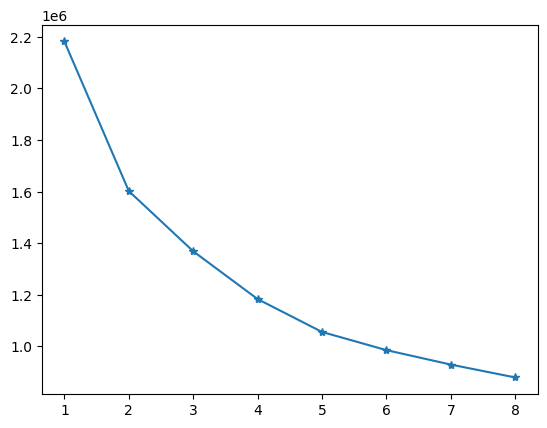

In [17]:
plt.plot(range(1,9),wcss,marker = '*')
plt.xticks(range(1,9))
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_

/home/miserver10/workspace_vscode/K-means/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/tmp/ipykernel_24560/4085950232.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=300, c='red', edgecolors='k', label='Centroids')


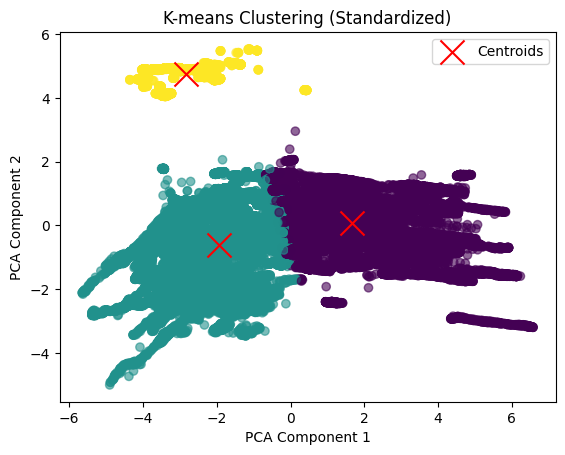

In [20]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=300, c='red', edgecolors='k', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (Standardized)')
plt.legend()
plt.show()

In [21]:
filtered_df['Cluster'] = labels 

cluster_summary_original_scale = filtered_df.groupby('Cluster').mean()
print("\nCluster Summary on Original Scale (Mean Values):")
print(cluster_summary_original_scale)


Cluster Summary on Original Scale (Mean Values):
         CR_Datc_AcnCompPwrCon_W  CR_Datc_OutTempSnr_C  \
Cluster                                                  
0                     392.326301             26.075527   
1                      26.914035              9.145909   
2                       0.000000             12.748514   

         CR_Datc_AcnCompSpdFB_rpm  CR_Datc_PTCPwrCon_W  CF_Datc_Heatpump_Mode  \
Cluster                                                                         
0                      996.006580             6.362501               0.021792   
1                      150.362173           906.564303               2.806530   
2                        0.000000             0.000000               7.000000   

         CR_Datc_SetTemp_C  CR_Datc_IncarSnsTemp_C  DATC_BlowerLevel  \
Cluster                                                                
0                21.828788               25.065158          3.567791   
1                22.036762           

/tmp/ipykernel_24560/3198129398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = labels
